In [ ]:
import os
from google.colab import files
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
def crop_center(image):
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

In [ ]:
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  # Cache image file locally.
  image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
  if img.max() > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

In [ ]:
def show(image):
  plt.figure(figsize=(6,6))
  plt.imshow(image[0])
  plt.axis("off")
  plt.savefig("stylized_image.jpg", transparent=True, bbox_inches='tight', pad_inches=0)

In [ ]:
content_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Golden_Gate_Bridge_from_Battery_Spencer.jpg/640px-Golden_Gate_Bridge_from_Battery_Spencer.jpg'

In [ ]:
style_image_url = 'https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg'

In [ ]:
content_img = load_image(content_image_url, (400,400))

65536/58102 [=================================] - 0s 0us/step


In [ ]:
style_img = load_image(style_image_url, (256, 256))

2686976/2684586 [==============================] - 0s 0us/step


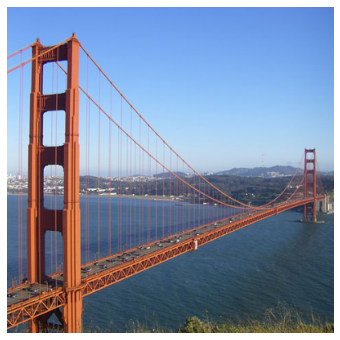

In [ ]:
show(content_img)

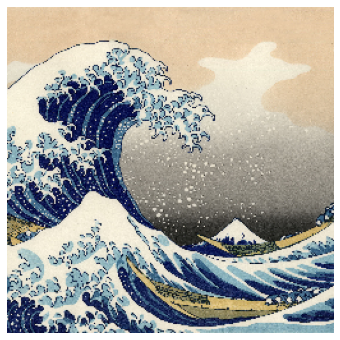

In [ ]:
show(style_img)

In [ ]:
outputs = hub_module(tf.constant(content_img), tf.constant(style_img))

In [ ]:
stylized_image = outputs[0]

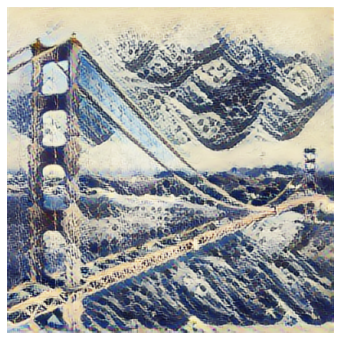

In [ ]:
show(stylized_image)

In [ ]:
files.download("stylized_image.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>